<a href="https://colab.research.google.com/github/eliasfeitoza/Certificados/blob/master/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando Notas em Geral

In [2]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ["Usuárioid","FilmeId","Nota","Momento"]
notas.head()

,Usuárioid,FilmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['Nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [6]:
notas['Nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['Nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

In [8]:
print("Media",notas["Nota"].mean())
print("Mediana",notas["Nota"].median())

Media 3.501556983616962
Mediana 3.5


In [9]:
notas.Nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

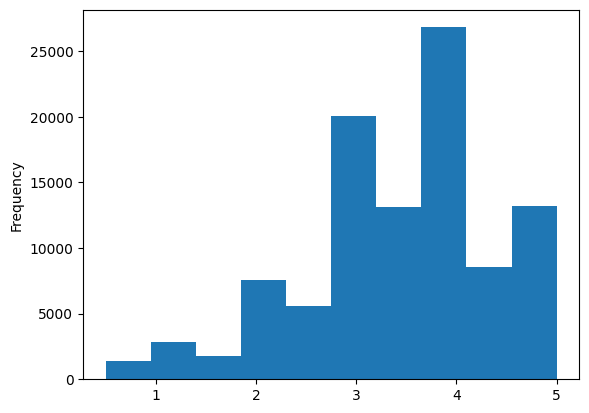

In [10]:
notas.Nota.plot(kind="hist")

In [11]:
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

<Axes: ylabel='Nota'>

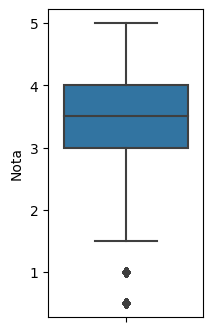

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,4))

sns.boxplot(y = notas.Nota)

In [13]:
# Importação da biblioteca pandas e apelidando a mesma de "pd" para uma melhor utilização
import pandas as pd
# importar o arquivo ratings.csv para um DataFrame - Criando a variavel de nome "nt" para receber o arquivo
# ja no servido da nuvem do Google Colab
nt = pd.read_csv('ratings.csv')
# Exibição das 5 primeiras linhas do dataframe através do comando head(5)
nt.head(5)
# Efetuando a alteração do idioma do titulo das colunas do dataFrame para o Português
nt.columns=["Id Usuário","Id Filme","Nota","Momento"]
nt.head()
#Verficação das notas de forma unificadas
nt.Nota.unique()
#Validando o volume de avaliação feita por usuários separada por notas
nt['Nota'].value_counts()
#Efetuando a impressão da Média e Mediana
print("Media",notas["Nota"].mean())
print("Mediana",notas["Nota"].median())




Media 3.501556983616962
Mediana 3.5


#Analisando Filmes

In [14]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmesId","Titulo","Genero"]
filmes.head()

,filmesId,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
notas.head()

,Usuárioid,FilmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Analisando algumas notas Específicas

In [16]:
notas.query("FilmeId==1").Nota.mean()

3.9209302325581397

In [17]:
notas.query("FilmeId==2").Nota.mean()

3.4318181818181817

In [18]:
notas.query("FilmeId==3").Nota.mean()

3.2596153846153846

In [19]:
media_por_filme = notas.groupby("FilmeId").mean().Nota
media_por_filme.head()

FilmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

In [20]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

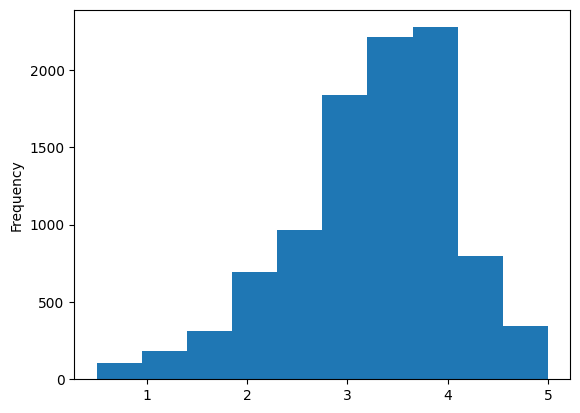

In [21]:
media_por_filme.plot(kind='hist')

<ipython-input-22-430f17eacbe2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_por_filme,bins = 10)


<Axes: xlabel='Nota', ylabel='Density'>

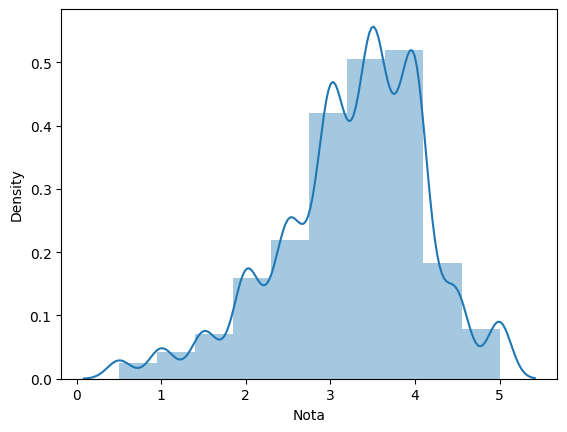

In [22]:
sns.distplot(media_por_filme,bins = 10)

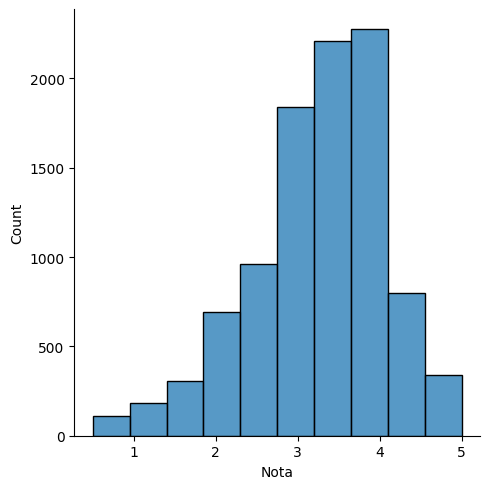

In [23]:
sns.displot(media_por_filme, bins=10)


Text(0.5, 1.0, 'Histograma das médias dos Filmes')

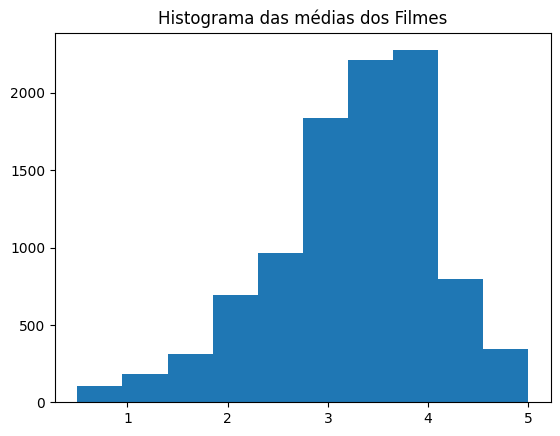

In [24]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme, bins=10)
plt.title("Histograma das médias dos Filmes")

#Exercicio do Módulo

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

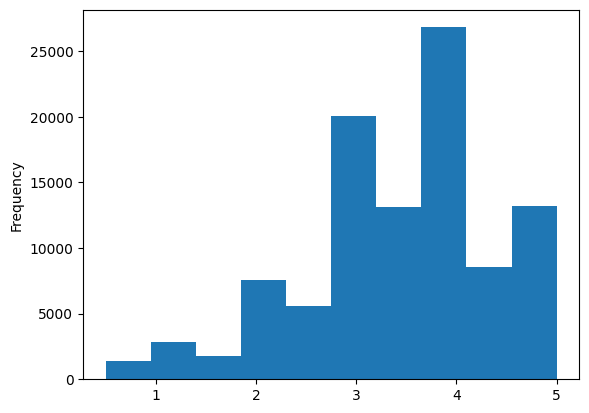

In [25]:

notas.Nota.plot(kind = "hist")
notas.Nota.describe()

<Axes: xlabel='Nota'>

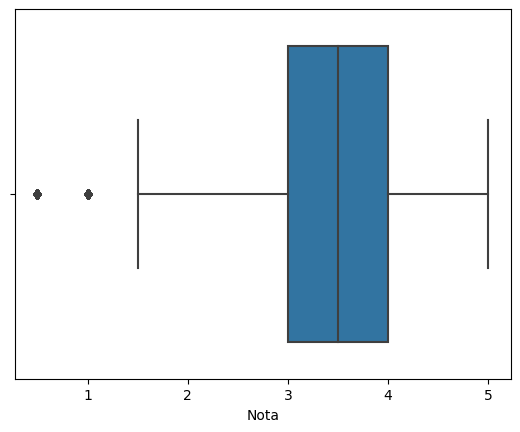

In [26]:
import seaborn as sns
sns.boxplot(x=notas.Nota)

<Axes: ylabel='Nota'>

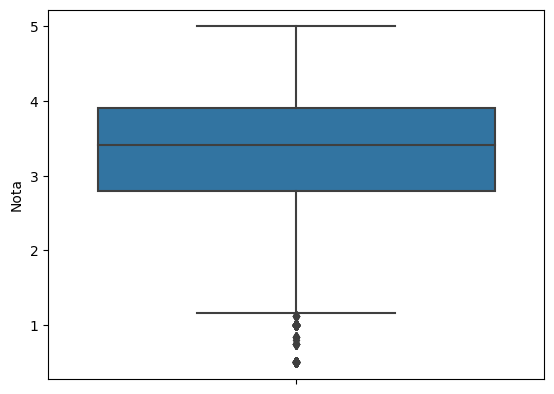

In [27]:
sns.boxplot(y=media_por_filme)

In [28]:
notas.query("FilmeId==1").Nota.mean()


3.9209302325581397

In [29]:
notas.query("FilmeId==2").Nota.mean()

3.4318181818181817

In [30]:
notas.groupby("FilmeId").Nota.mean()


FilmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: Nota, Length: 9724, dtype: float64

##Tipos de variáveis
Variável é a característica de interesse que é medida em cada elemento da amostra ou população. Como o nome diz, seus valores variam de elemento para elemento. As variáveis podem ter valores numéricos ou não numéricos.

Variáveis podem ser classificadas da seguinte forma:

Variáveis Quantitativas: são as características que podem ser medidas em uma escala quantitativa, ou seja, apresentam valores numéricos que fazem sentido. Podem ser contínuas ou discretas.

Variáveis discretas: características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores e, assim, somente fazem sentido valores inteiros. Geralmente são o resultado de contagens.
Exemplos: número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.

Variáveis contínuas, características mensuráveis que assumem valores em uma escala contínua (na reta real), para as quais valores fracionais fazem sentido. Usualmente devem ser medidas através de algum instrumento. Exemplos: peso (balança), altura (régua), tempo (relógio), pressão arterial, idade.

Variáveis Qualitativas (ou categóricas): são as características que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

Variáveis nominais: não existe ordenação dentre as categorias. Exemplos: sexo, cor dos olhos, fumante/não fumante, doente/sadio.

Variáveis ordinais: existe uma ordenação entre as categorias. Exemplos: escolaridade (1o, 2o, 3o graus), estágio da doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro,..., dezembro).

As distinções são menos rígidas do que a descrição acima insinua.

Uma variável originalmente quantitativa pode ser coletada de forma qualitativa.
Por exemplo, a variável idade, medida em anos completos, é quantitativa (contínua); mas, se for informada apenas a faixa etária (0 a 5 anos, 6 a 10 anos, etc...), é qualitativa (ordinal). Outro exemplo é o peso dos lutadores de boxe, uma variável quantitativa (contínua) se trabalhamos com o valor obtido na balança, mas qualitativa (ordinal) se o classificarmos nas categorias do boxe (peso-pena, peso-leve, peso-pesado, etc.).

Outro ponto importante é que nem sempre uma variável representada por números é quantitativa.
O número do telefone de uma pessoa, o número da casa, o número de sua identidade. Às vezes o sexo do indivíduo é registrado na planilha de dados como 1 se macho e 2 se fêmea, por exemplo. Isto não significa que a variável sexo passou a ser quantitativa!

Exemplo do ursos marrons (continuação):
No conjunto de dados ursos marrons, são qualitativas as variáveis sexo (nominal) e mês da observação (ordinal); são quantitativas contínuas as demais: idade, comprimento da cabeça, largura da cabeça, perímetro do pescoço, perímetro do tórax, altura e peso.

In [31]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [42]:
tmdb["vote_average"].unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])